<a href="https://colab.research.google.com/github/sahil-kishor/Netflix-Movies-and-Tv-Series-Clustering/blob/main/Machine_Learning_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual/Team
##### **Name -** Sahil Kishor


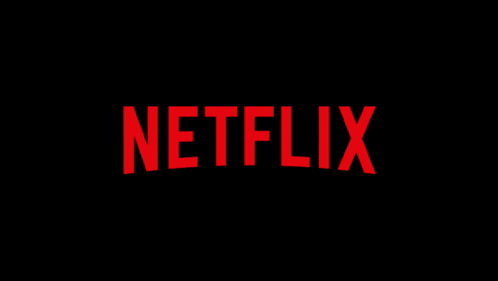

# **Project Summary**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
The project,
* Exploratory Data Analysis
* Understanding what type content is available in different countries

* Clustering similar content by matching text-based features

# **GitHub Link**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

### Import Libraries

In [5]:
# Importing necessary libraries
# Import Pandas for data manipulation and analysis
import pandas as pd

# Import NumPy for numerical computing and array operations
import numpy as np

# Import Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import Missingno for visualizing missing data patterns
import missingno as msno

# Import Matplotlib's colormap module for color map manipulations
import matplotlib.cm as cm

# Import Geopandas for working with geospatial data
import geopandas as gpd

# Install or upgrade the 'country_converter' package using pip
!pip install country_converter --upgrade

# Import country_converter for converting country names and codes
import country_converter as coco

# Import Plotly Express for interactive visualizations
import plotly.express as px

# Import the 'string' module for working with strings and punctuation
import string

# Import statistics module from SciPy for statistical computations
from scipy import stats

# Import CountVectorizer and TfidfVectorizer for text feature extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import WordCloud, STOPWORDS, and ImageColorGenerator for text visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Import NLTK modules for natural language processing
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

# Import cosine_similarity from scikit-learn for text similarity
from sklearn.metrics.pairwise import cosine_similarity

# Import PCA for Principal Component Analysis
from sklearn.decomposition import PCA

# Import silhouette_score and silhouette_samples for cluster evaluation
from sklearn.metrics import silhouette_score, silhouette_samples

# Import KMeans for k-means clustering
from sklearn.cluster import KMeans

# Import hierarchy module from SciPy for hierarchical clustering
import scipy.cluster.hierarchy as shc

# Import AgglomerativeClustering for agglomerative hierarchical clustering
from sklearn.cluster import AgglomerativeClustering

# Import SilhouetteVisualizer for visualizing silhouette scores
from yellowbrick.cluster import SilhouetteVisualizer

# Import warnings for managing warning messages
import warnings

# Ignore warning messages to improve code readability
warnings.filterwarnings('ignore')

# Import Spacy and other libraries for preprocessing and analysis
import spacy
import en_core_web_sm
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD
from nltk import ne_chunk
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MultiLabelBinarizer, OneHotEncoder

# Additional libraries for clustering and visualization
import matplotlib.cm as cm
from sklearn import metrics
import plotly.express as px
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load Spacy language model
nlp = en_core_web_sm.load()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 751.6 kB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Dataset Loading

In [2]:
# Mounting colab notebook with my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Addressing the path to the Netflix Movies and TV Shows Clustering.csv
path = '/content/drive/MyDrive/Almabetter Projects/Machine Learning Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
# Importing the dataset into python as a pandas dataframe
nf = pd.read_csv(path)

### Dataset First View

In [6]:
# Concatinating the head and tail of the nf dataframe
concatenated_df = pd.concat([nf.head(), nf.tail()])
# First view of the Netflix dataframe 'nf'
concatenated_df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty

### Dataset Information

In [7]:
# Basic Info
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
# Statistical description of the dataset
nf.describe(include='all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Dataset Rows & Columns count

In [9]:
# Shape, Columms and Rows of the dataset
print(f"Shape of the dataset : {nf.shape}")

print("Data Columns:")
print(nf.columns,'\n')

rows = nf.shape[0]
columns = nf.shape[1]
print(f"The total number of Rows and Columns are:\nRows : {rows}\nColumns : {columns}")

Shape of the dataset : (7787, 12)
Data Columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object') 

The total number of Rows and Columns are:
Rows : 7787
Columns : 12


## **2. Cleaning Data**

In [10]:
# Checking for NULL and DUPLICATE values

# Defining a custom fuction to check the amout of Null values and Duplicate values
def netflixinfo():
  temp=pd.DataFrame(index=nf.columns)   # Making the Columns as the Index
  temp["Datatype"]=nf.dtypes
  temp["Not-Null values"]=nf.count()
  temp["Null value"]=nf.isnull().sum()
  temp["Percentage of the null value"] = (nf.isnull().mean() * 100).round(2)
  temp["Duplicate Values"] = (nf.duplicated().sum())
  temp["Percentage of the Duplicate Value"] = (nf.duplicated().mean() * 100).round(2)
  return temp
netflixinfo()

Datatype  Not-Null values  Null value  \
show_id        object             7787           0   
type           object             7787           0   
title          object             7787           0   
director       object             5398        2389   
cast           object             7069         718   
country        object             7280         507   
date_added     object             7777          10   
release_year    int64             7787           0   
rating         object             7780           7   
duration       object             7787           0   
listed_in      object             7787           0   
description    object             7787           0   

              Percentage of the null value  Duplicate Values  \
show_id                               0.00                 0   
type                                  0.00                 0   
title                                 0.00                 0   
director                             30.68                 0   
cast                                  9.22                 0   
country                               6.51                 0   
date_added                            0.13                 0   
release_year                          0.00                 0   
rating                                0.09                 0   
duration                              0.00                 0   
listed_in                             0.00                 0   
description                           0.00                 0   

              Percentage of the Duplicate Value  
show_id                                     0.0  
type                                        0.0  
title                                       0.0  
director                                    0.0  
cast                                        0.0  
country                                     0.0  
date_added                                  0.0  
release_year                                0.0  
rating                                      0.0  
duration                                    0.0  
listed_in                                   0.0  
description                                 0.0

### **Insights and Findings:**
  * There are no duplicate values in the dataset
  * There is large number of null values in the Directors Column followed by Cast, Country, Date Added and rating

## **Handling Missing or Null Values**

In [12]:
# Look on the null values
null = nf.isnull().sum().sort_values(ascending=False)
null_df = pd.DataFrame(null, columns=['Null_Count'])
print("Columns with Null Values:")
null_df.head()

Columns with Null Values:


Null_Count
director          2389
cast               718
country            507
date_added          10
rating               7

* date_added and rating	 columns have a very less amount of null values which we can drop
* cast and country column have some huge quantity of null values compared to the previous two which we can impute
* director column has a large number of Null values, we'll replace the values so that we can use it for further analysis

In [13]:
# Imputing cast and country column with mode
nf['cast'].fillna(value='No cast',inplace=True)
nf['country'].fillna(value=nf['country'].mode()[0],inplace=True)


In [14]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
nf.dropna(subset=['date_added','rating'],inplace=True)

In [15]:
# Filling the 'na' vaalues of the directors columns as well use it for clustering.
nf.fillna('',inplace=True)

In [16]:
# Checking again for Null Values
null = nf.isnull().sum().sort_values(ascending=False)
null_df = pd.DataFrame(null, columns=['Null_Count'])
print("Columns with Null Values:")
null_df

Columns with Null Values:


Null_Count
show_id                0
type                   0
title                  0
director               0
cast                   0
country                0
date_added             0
release_year           0
rating                 0
duration               0
listed_in              0
description            0

In [17]:
# Rows and Columns of the dataframe after cleaning
rows = nf.shape[0]
columns = nf.shape[1]
print(f"The total number of Rows and Columns are:\nRows : {rows}\nColumns : {columns}")

The total number of Rows and Columns are:
Rows : 7770
Columns : 12


In [ ]:
# We have succesfully Cleaned our Data

## 3. ***Data Wrangling***

In [19]:
# code to make your dataset analysis ready.

# Convert date_added to datetime format
nf['date_added'] = pd.to_datetime(nf['date_added'])

# Extract year and month from date_added
nf['added_year'] = nf['date_added'].dt.year
nf['added_month'] = nf['date_added'].dt.month
nf['duration_minutes'] = nf['date_added'].dt.minute

# Extracting Year and Month: I extracted the year and month from the 'date_added' column using the .dt.year and .dt.month attributes, respectively.
# This allows for time-based analysis, such as tracking when content was added to Netflix.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Data Vizualization and Analysis

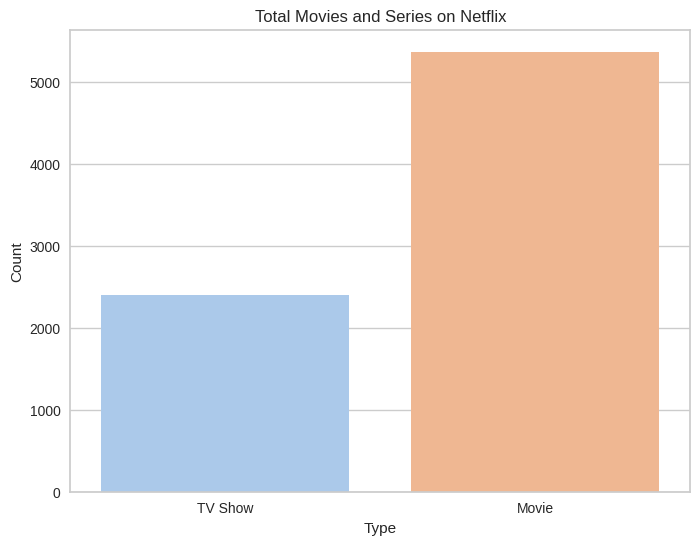

In [20]:
# Ploting the Count of Movies and Series
plt.figure(figsize=(8, 6))

# Plot the countplot
sns.countplot(data=nf, x='type', palette=sns.color_palette('pastel'))
plt.title('Total Movies and Series on Netflix')  # Set the title of the plot
plt.xlabel('Type')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.show()

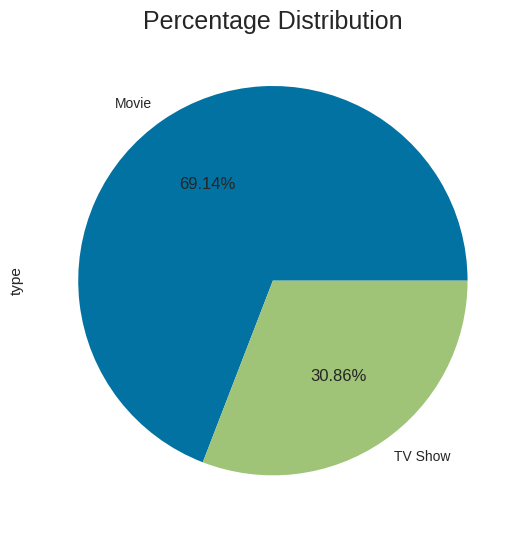

In [22]:
# piechart for percentage distribution
import matplotlib.pyplot as plt

# Plotting the pie chart
nf['type'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Percentage Distribution', size=18)

plt.tight_layout()
plt.show()


### **Insight and Findings**:
 * Almost 70% of datapoints belong to Movie,
 * rest 30% to TV Show

In [23]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
nf['target_ages'] = nf['rating'].replace(ratings)


In [24]:
# type should be a catego
nf['type'] = pd.Categorical(nf['type'])

# target_ages is another category (4 classes)
nf['target_ages'] = pd.Categorical(nf['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [25]:
#creating two extra columns
tv_shows=nf[nf['type']=='TV Show']
movies=nf[nf['type']=='Movie']

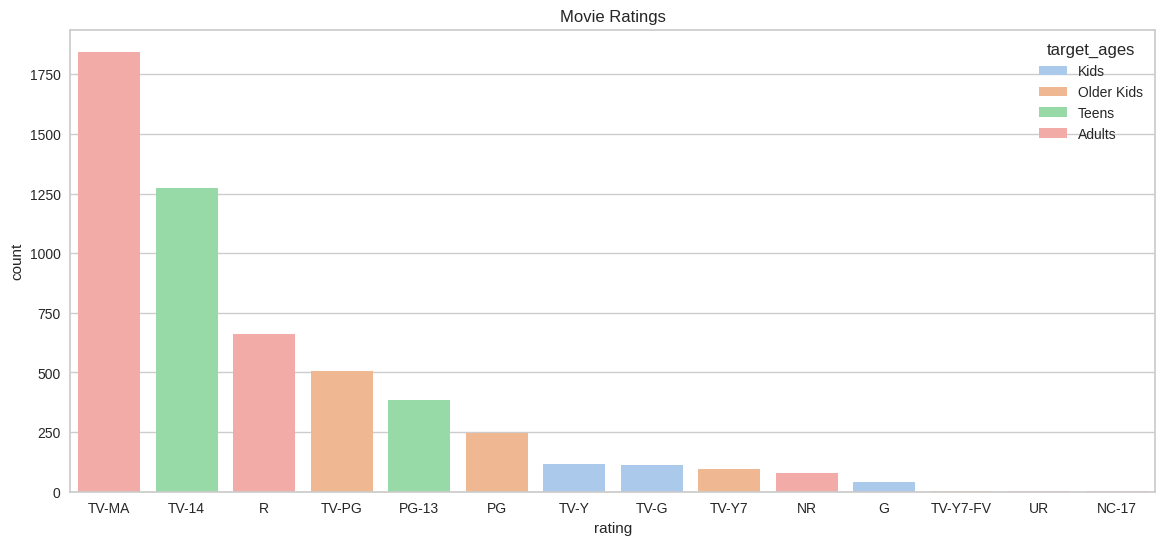

In [26]:
#Movie Ratings based on Target Age Groups
plt.figure(figsize=(14,6))
plt.title('Movie Ratings')

# Set the color palette
sns.set_palette(sns.color_palette('pastel'))

# Plot the countplot
sns.countplot(x=movies['rating'], hue=movies['target_ages'], data=movies, order=movies['rating'].value_counts().index)

plt.show()

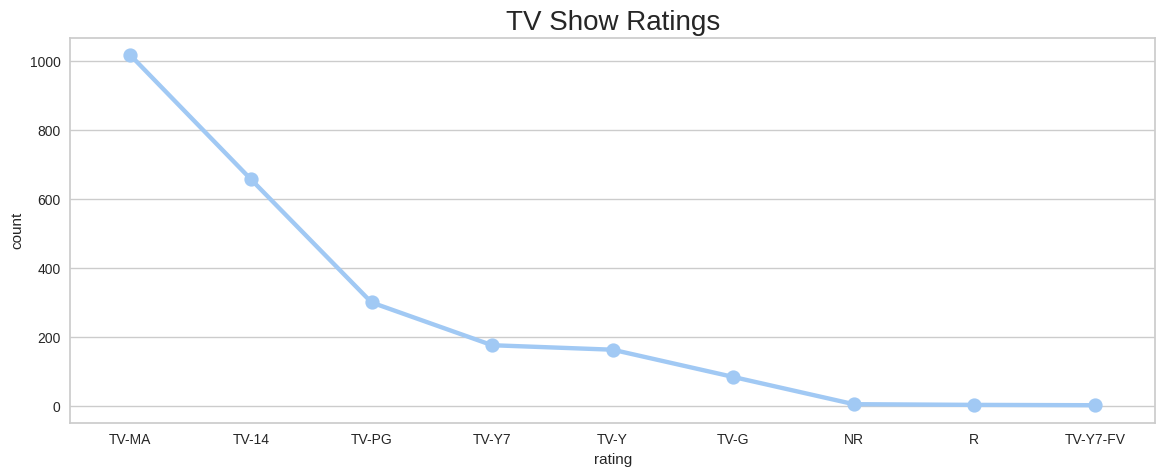

In [27]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (14,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

In [28]:
# Preparing Data for a Heatmap to show 'Distribution of Target Age Groups for Top 10 Countries'
# Adding a 'count' column to the DataFrame with a value of 1 for each row
nf['count'] = 1

# Grouping the data by 'country' and calculating the count of occurrences for each country
# Sorting the data in descending order based on count
data = nf.groupby('country')[['country','count']].sum().sort_values(by='count', ascending=False).reset_index()[:10]

# Extracting the top 10 countries based on count and retaining only the 'country' column
data = data['country']

# Filtering the DataFrame to include only rows where the 'country' is in the top 10 countries
df_heatmap = nf.loc[nf['country'].isin(data)]

# Creating a cross-tabulation between 'country' and 'target_ages', normalized by the index
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'], normalize="index").T
# Dataset for Heat Map
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Kids         0.180791  0.000000  0.095652  0.016251  0.008929    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.272321    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.352679    0.14   
Adults       0.446328  0.277228  0.678261  0.255688  0.366071    0.77   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Kids            0.027322  0.022388        0.093434       0.089479  
Older Kids      0.120219  0.044776        0.204545       0.195346  
Teens           0.382514  0.097015        0.189394       0.243199  
Adults          0.469945  0.835821        0.512626       0.471976

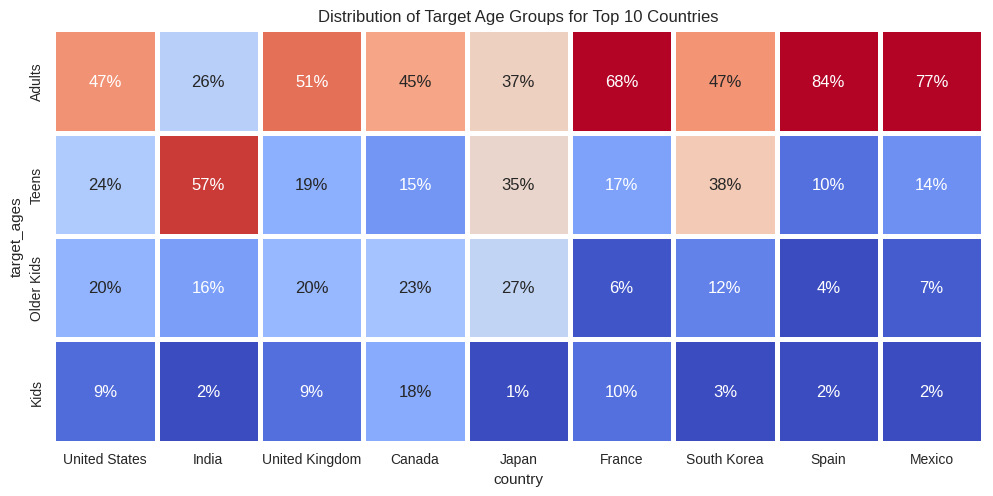

In [29]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Defining the order of countries and target ages for the heatmap
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

# Creating the heatmap using Seaborn's heatmap function
sns.heatmap(df_heatmap.loc[age_order, country_order2], cmap="coolwarm", square=True, linewidth=2.5, cbar=False,
            annot=True, fmt='1.0%', vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize":12})

# Adding a title to the heatmap
plt.title('Distribution of Target Age Groups for Top 10 Countries')

# Displaying the heatmap
plt.show()


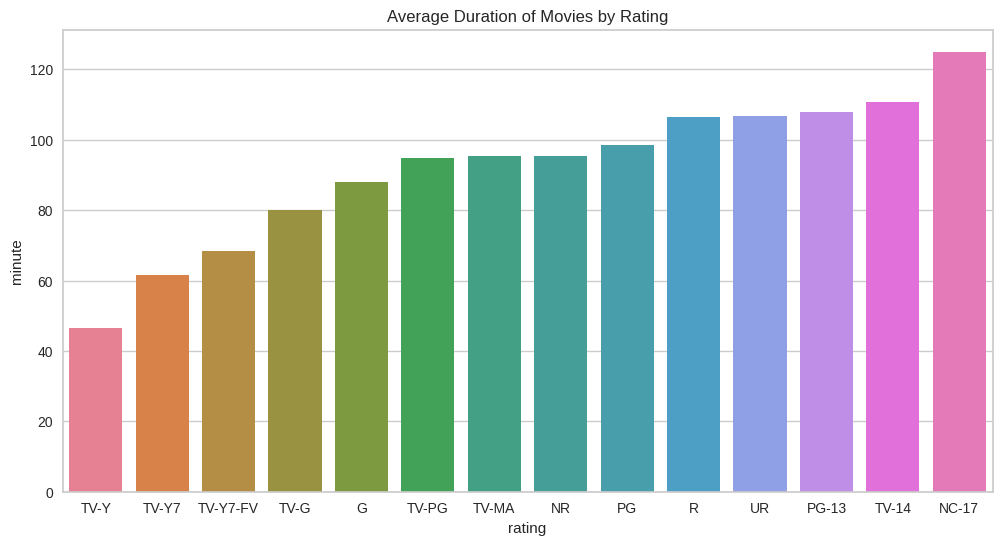

In [30]:
# Average Duration of Movies by Rating
# Extracting duration in minutes from the 'duration' column
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)

# Calculating the mean duration by rating
duration_year = movies.groupby(['rating'])['minute'].mean()

# Creating a DataFrame with mean durations and sorting
duration_df = pd.DataFrame(duration_year).sort_values('minute')

# Defining a seaborn color palette with enough distinct colors
color_palette = sns.color_palette("husl", len(duration_df))

# Plotting a barplot with the specified color palette
plt.figure(figsize=(12,6))
ax = sns.barplot(x=duration_df.index, y=duration_df.minute, palette=color_palette)

# Adding a title to the plot
plt.title('Average Duration of Movies by Rating')

# Displaying the plot
plt.show()


### **Insights and Findings**
  * Those movies that have a rating of NC-17 have the longest average duration.
  * When it comes to movies having a TV-Y rating, they have the shortest runtime on average

In [32]:
# Top and and Bottom Genre in Netflix
# seperating genre from listed_in columns for analysis purpose
genres = nf['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head(10)

genre  count
0      International Movies   2437
1                    Dramas   2105
2                  Comedies   1471
3    International TV Shows   1197
4             Documentaries    786
5        Action & Adventure    721
6                 TV Dramas    703
7        Independent Movies    673
8  Children & Family Movies    532
9           Romantic Movies    531

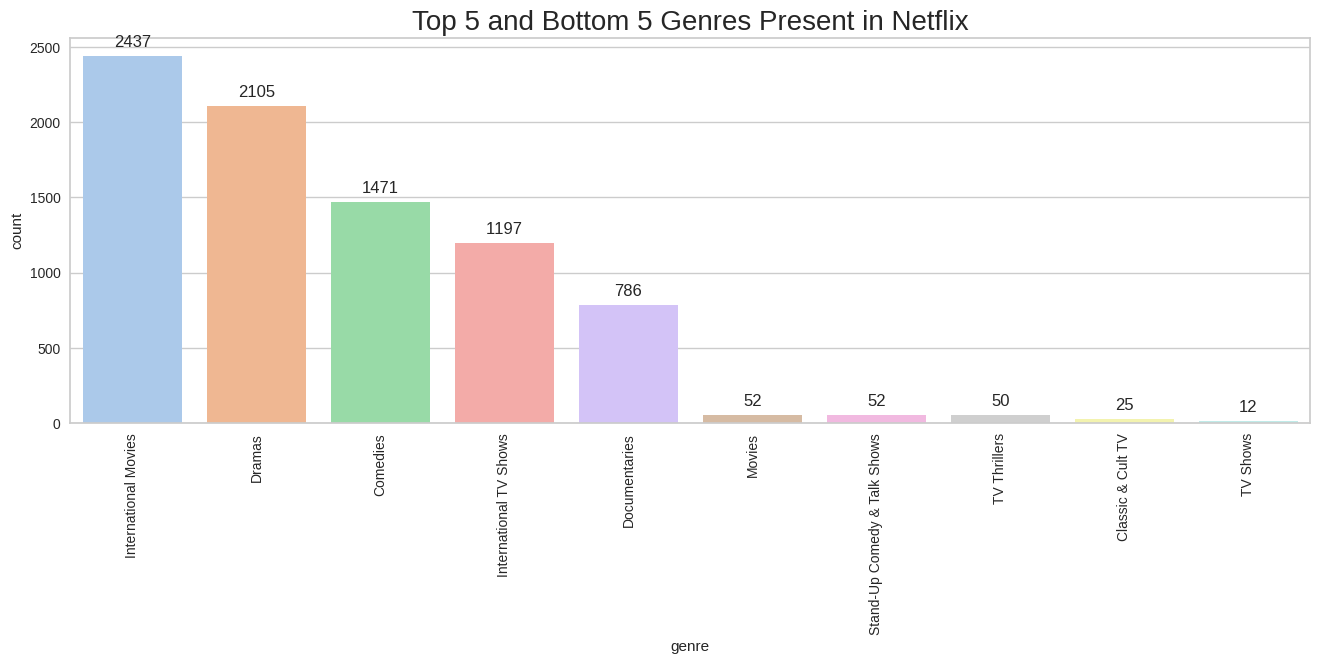

In [33]:
# plotting graph
# Sorting genres by count in descending order
sorted_genres = genres.sort_values(by='count', ascending=False)

# Selecting the top 5 and bottom 5 genres
top5_genres = sorted_genres.head(5)
bottom5_genres = sorted_genres.tail(5)

# Concatenating the top 5 and bottom 5 genres
combined_genres = pd.concat([top5_genres, bottom5_genres])

# Plotting the barplot with seaborn pastel color palette
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data=combined_genres, palette='pastel')
graph.set_title('Top 5 and Bottom 5 Genres Present in Netflix', size=20)
plt.xticks(rotation=90)

# Adding value count on the top of each bar
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


### **Insights and findings**

*  Highest number of genre belong from International movies, Dramas, Comedies respectively.
* Least number of genre belong from Classic & cult TV, TV Thriller, Stand-Up comedy and Talk show.

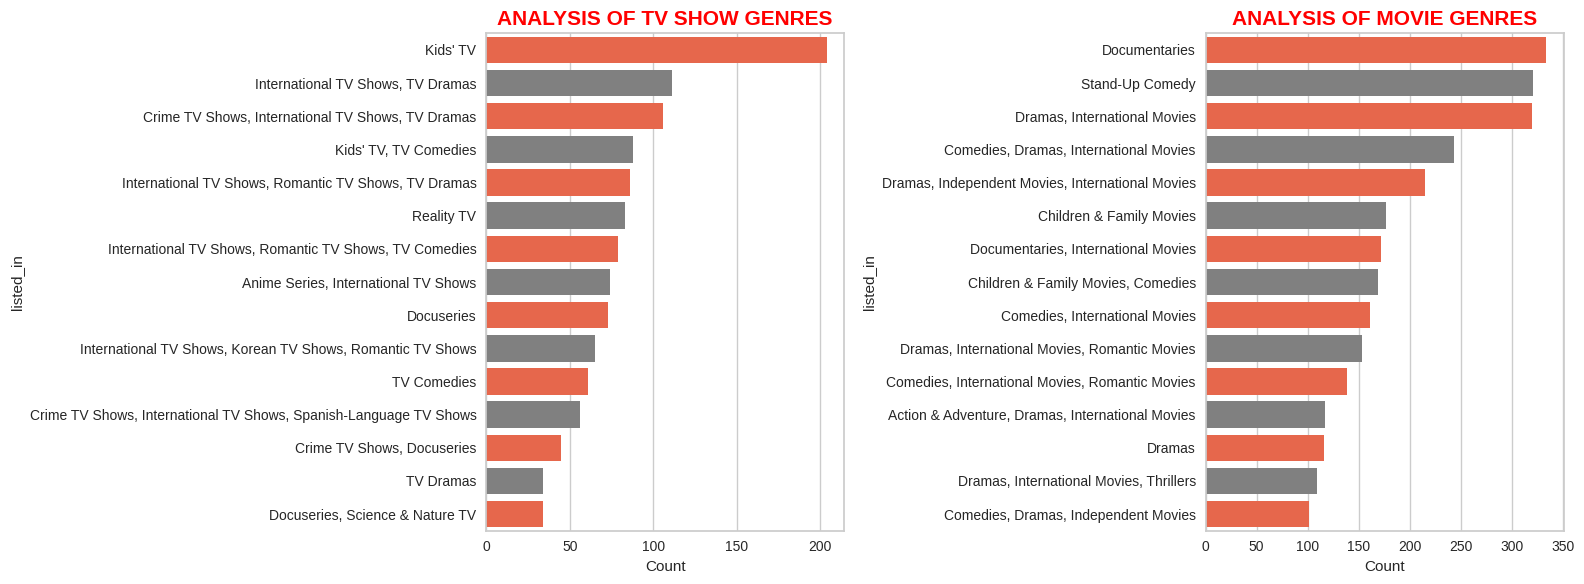

In [34]:
# Set the figure size for the side-by-side plots.
plt.figure(figsize=(16, 6))

# Analysis of TV shows listed in different categories
plt.subplot(1, 2, 1)  # Create the left subplot for TV shows.
sns.countplot(y="listed_in", data=tv_shows, palette=["#FF5733", "#808080"],  # Custom colors
              order=tv_shows['listed_in'].value_counts().index[0:15])  # Displaying top 15 categories.
plt.title('ANALYSIS OF TV SHOW GENRES', fontsize=15, fontweight='bold', color='red')  # Set title and font.
plt.xlabel("Count")  # Set x-axis label.

# Analysis of movie shows listed in different categories
plt.subplot(1, 2, 2)  # Create the right subplot for movie shows.
sns.countplot(y="listed_in", data=movies, palette=["#FF5733", "#808080"],  # Custom colors
              order=movies['listed_in'].value_counts().index[0:15])  # Displaying top 15 categories.
plt.title('ANALYSIS OF MOVIE GENRES', fontsize=15, fontweight='bold', color='red')  # Set title and font.
plt.xlabel("Count")  # Set x-axis label.

plt.tight_layout()  # Adjust the spacing between subplots.
plt.show()  # Display the subplots.


Insights from the subplots:
The subplots provide a clear overview of the most popular genres for TV shows and movies. They highlight viewer preferences and help in strategic programming decisions.

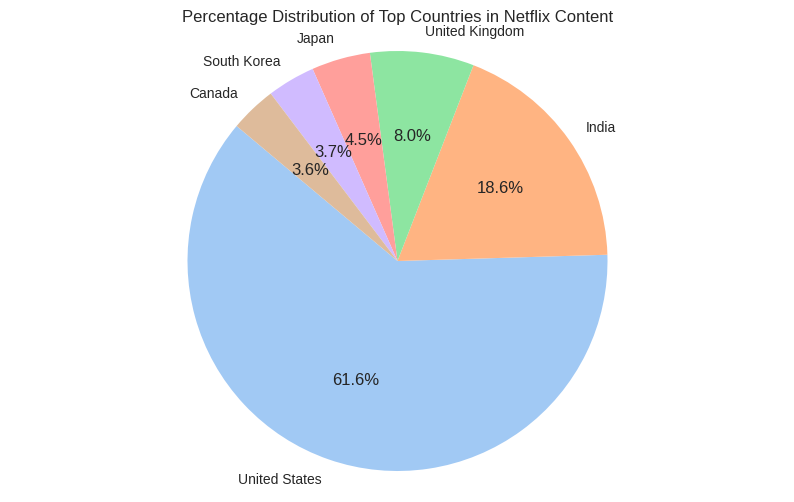

In [35]:
# Count the occurrences of each country in the df
country_counts = nf['country'].value_counts().reset_index()

# Filter countries that contribute more than 2% of the total content
selected_countries = country_counts[country_counts['country'] / country_counts['country'].sum() > 0.02]

# Create a pie chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.pie(selected_countries['country'], labels=selected_countries['index'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Top Countries in Netflix Content')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


The chart provides insights into the distribution of content across different countries on Netflix. It highlights the countries that contribute more than 1% of the total content, indicating the prominent content producers within the platform. This insight aids in understanding the global diversity of content sources and can guide decisions related to regional content acquisition, localization, and audience targeting strategies.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



**Statement 1:** The average number of movies on Netflix in the United States is significantly different from the average number of movies on Netflix in India.

**Statement 2:** The proportions of Movies is significantly different from TV Shows.

### **Hypothetical Statement - 1**

**Statement 2:** The average number of movies on Netflix in the United States is significantly different from the average number of movies on Netflix in India.

**Null Hypothesis (H0):** There is no significant difference in the release years between movies produced in the United States and movies produced in India.

**Alternative Hypothesis (Ha):** There is a significant difference in the release years between movies produced in the United States and movies produced in India.

In [36]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Filter the movies DataFrame to create two new DataFrames:
# One containing only movies produced in the United States, and one containing only movies produced in India
us_movie_df = nf[nf.country == 'United States']
india_movie_df = nf[nf.country == 'India']

# Perform a two-sample t-test between the release years of the two groups of movies
t_statistic, p_value = ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Set the significance level to 0.05
alpha = 0.05

# Print the calculated t-statistic and p-value
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check if the calculated p-value is less than the significance level
if p_value < alpha:
    # If the p-value is less than the significance level, reject the null hypothesis
    print("Reject Null Hypothesis: There is a significant difference in release years between movies produced in the United States and India.")
else:
    # If the p-value is greater than or equal to the significance level, fail to reject the null hypothesis
    print("Fail to Reject Null Hypothesis: No significant difference in release years between movies produced in the United States and India.")

# Deleting the temporary dataframes we obtained to calculate the alpha value
del us_movie_df
del india_movie_df

T-Statistic: 6.233189799585394
P-Value: 5.898932090525946e-10
Reject Null Hypothesis: There is a significant difference in release years between movies produced in the United States and India.


##### Which statistical test have you done to obtain P-Value?


The statistical test I used to obtain the p-value in this case is the is **two-sample t-test**, also known as an **independent samples t-test** or **unpaired t-test**. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movie data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

### **Hypothetical Statement - 2**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Statement 3:** There is a significant difference between the proportions of Movies and TV Shows.

**Null Hypothesis (H0):** The proportion of movies in the dataset is equal to the proportion of TV shows.

**Alternative Hypothesis (H1):** The proportion of movies in the dataset is greater than the proportion of TV shows.

#### 2. Perform an appropriate statistical test.

In [37]:
from statsmodels.stats.proportion import proportions_ztest

# Count the number of movies and TV shows in the DataFrame
n_movies = nf[nf['type'] == 'Movie'].count()['type']
n_tv_shows = nf[nf['type'] == 'TV Show'].count()['type']

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(nf), len(nf)]  # Total number of observations in the DataFrame

# Perform a z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results of the z-test
print('z-statistic:', z_stat)
print('p-value:', p_val)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_val < alpha:
    print('Reject Null Hypothesis: There is a significant difference between the proportions of Movies and TV Shows.')
else:
    print('Fail to Reject Null Hypothesis: There is no significant difference between the proportions of Movies and TV Shows.')


z-statistic: 47.71395895355864
p-value: 0.0
Reject Null Hypothesis: There is a significant difference between the proportions of Movies and TV Shows.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the **Z-test for proportions**. This test is used to compare the proportions of two independent groups and determine if there is a significant difference between them. In this case, the proportions being compared are the proportions of movies and TV shows in the dataset.

##### Why did you choose the specific statistical test?

I chose the **Z-test for proportions** in this specific scenario because we are comparing two proportions (the proportion of movies and TV shows) in a large dataset. The Z-test is appropriate when we have a large sample size and can assume that the sampling distribution of proportions follows a normal distribution. Since we are comparing categorical data (movies vs. TV shows) to determine if there is a significant difference in their proportions, the Z-test is a suitable choice. Additionally, the Z-test is useful when we have prior knowledge about the population proportion (in this case, assuming no difference), and we want to test if the observed data significantly deviates from this assumption.

## ***6. Feature Engineering & Data Pre-processing***

### **1. Handling Outliers**

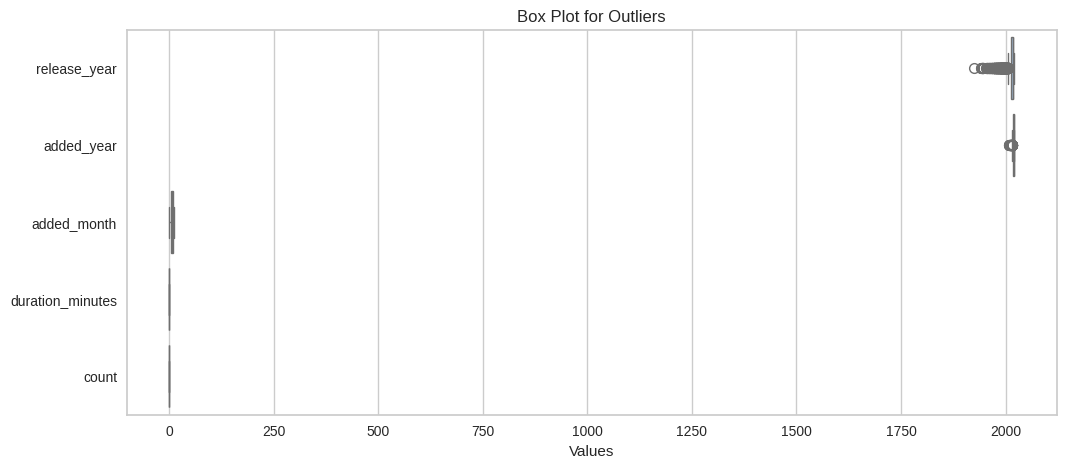

In [38]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=nf, orient='h')
plt.title("Box Plot for Outliers")
plt.xlabel("Values")
plt.show()

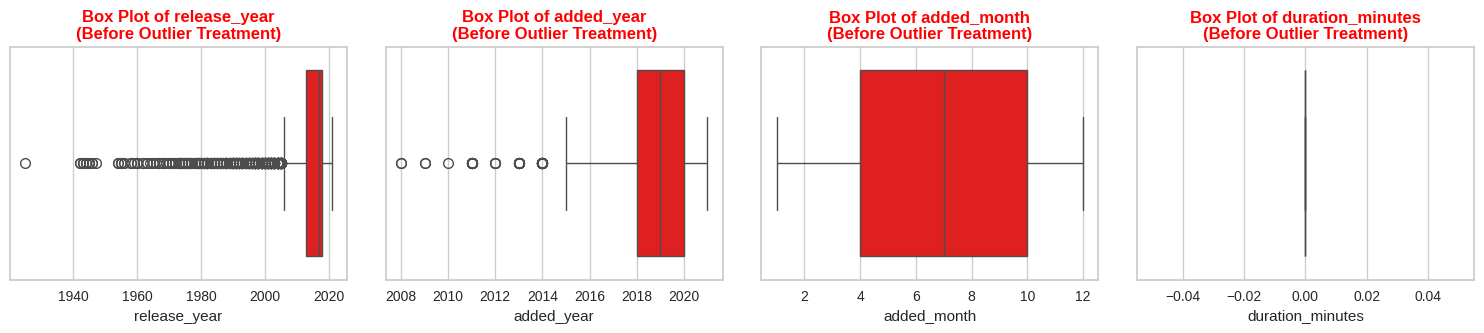

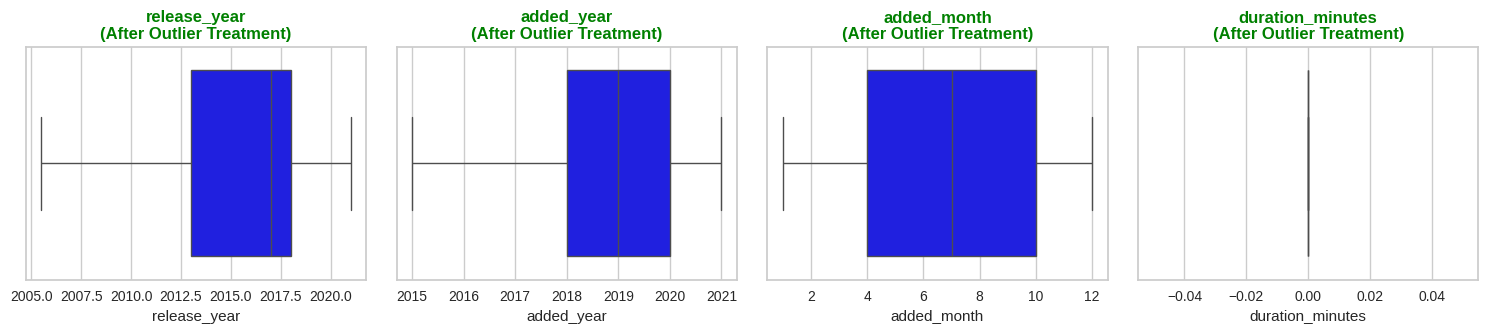

In [39]:
# Handling Outliers & Outlier treatments

# List of numerical columns for outlier treatment
cols_to_handle_outliers = ['release_year', 'added_year', 'added_month', 'duration_minutes']

# Visualize box plots of columns before outlier treatment
plt.figure(figsize=(15, 6))

for i, col in enumerate(cols_to_handle_outliers, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=nf[col], color='red')
    plt.title(f'Box Plot of {col}\n(Before Outlier Treatment)', fontsize=12, fontweight='bold',color='red')

plt.tight_layout()
plt.show()

# Define a function for outlier treatment using IQR method
def handle_outliers_iqr(col):
    Q1 = nf[col].quantile(0.25)
    Q3 = nf[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the lower or upper bound value
    nf.loc[nf[col] < lower_bound, col] = lower_bound
    nf.loc[nf[col] > upper_bound, col] = upper_bound

# Handle outliers for all specified columns using the defined function
for col in cols_to_handle_outliers:
    handle_outliers_iqr(col)

# Visualize box plots of columns after outlier treatment
plt.figure(figsize=(15, 6))

for i, col in enumerate(cols_to_handle_outliers, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=nf[col], color='blue')
    plt.title(f'{col}\n(After Outlier Treatment)', fontsize=12, fontweight='bold',color='green')

plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used the **Interquartile Range (IQR)** method for outlier treatment. The IQR method is a robust approach to identify and handle outliers in a dataset. Here's why I chose this technique and some details about its implementation:

**Outlier Treatment Technique**: **Interquartile Range (IQR) Method**

**Robustness:** The IQR method is less sensitive to extreme values compared to methods like mean and standard deviation. It uses the middle 50% of the data, making it more robust to the influence of outliers.

**Simple and Easy to Implement**: The IQR method is straightforward to implement and does not require complex calculations. It involves calculating the first quartile (Q1), third quartile (Q3), and the IQR (Q3 - Q1) to define the lower and upper bounds for outlier detection.

**Retains Data Distribution:** The IQR method identifies outliers based on the spread of the data, allowing us to retain the original distribution as much as possible.

**Non-parametric Approach:** The IQR method is non-parametric, meaning it does not assume any specific underlying data distribution. This makes it suitable for datasets with non-normally distributed data.

**Steps of IQR Outlier Treatment:**

1.Calculate the first quartile (Q1) and third quartile (Q3) of the data.

2.Calculate the IQR as the difference between Q3 and Q1 (IQR = Q3 - Q1).

3.Define lower bound as Q1 - 1.5 * IQR and upper bound as Q3 + 1.5 * IQR.

4.Replace any data points that fall below the lower bound or above the upper bound with the respective bound values.

### **2. Categorical Encoding**

In [40]:
# Encode your categorical columns
# Select categorical columns to be one-hot encoded
categorical_columns = ['type', 'rating', 'target_ages']

# Perform one-hot encoding
encoded_df = pd.get_dummies(nf, columns=categorical_columns)

# Display the encoded DataFrame
print(encoded_df.head())

  show_id  title           director  \
0      s1     3%                      
1      s2   7:19  Jorge Michel Grau   
2      s3  23:59       Gilbert Chan   
3      s4      9        Shane Acker   
4      s5     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year   duration  \
0 2020-08-14        2020.0  4 Seasons   
1 2016-12-23        2016.0     93 min   
2 2018-12-20        2011.0     78 min   
3 2017-11-16        2009.0     80 min   
4 2020-01-01        2008.0    123 min   

                                           listed_in  \
0  International TV Shows, TV Drama

#### What all categorical encoding techniques have you used & why did you use those techniques?

 I have used one-hot encoding as the categorical encoding technique. One-hot encoding is chosen for the following reasons:

**Type of Data:** One-hot encoding is well-suited for categorical variables with nominal or unordered data, such as the "type," "rating," and "target_ages" columns in the Netflix dataset. These columns contain categories that don't have any inherent order.

**Preservation of Information:** One-hot encoding preserves the information that a certain category is present in a particular observation while avoiding any ordinal relationship assumptions. This is important for columns like "rating" and "target_ages," where the categories don't have a natural order.

**Model Compatibility:** Many machine learning algorithms require numerical input data. One-hot encoding transforms categorical data into a binary format, making it compatible with a wide range of models without imposing any unintended order or meaning on the categories.

**Interpretability:** One-hot encoding creates separate binary columns for each category, making it easy to interpret the encoded data and understand the presence or absence of specific categories in a given observation.

For these reasons, one-hot encoding is a suitable choice for the categorical columns in the Netflix dataset, enabling better compatibility with machine learning algorithms while preserving the integrity of the categorical information.

### **3. Textual Data Preprocessing**


**Modelling Approach:**



*   Select the attributes based on which you want to cluster the shows
*   Text preprocessing: Remove all non-ascii characters, stopwords and punctuation marks, convert all textual data to lowercase
*   Lemmatization to generate a meaningful word out of corpus of words
*   Tokenization of corpus
*   Word vectorization
*   Dimensionality reduction
*   Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques
*   Build an optimal number of clusters and visualise the contents of each cluster using word clouds

In [41]:
# The director, cast, country, genre, and description are chosen as the attributes to cluster
# Combining all the clustering attributes into a single column
nf['clustering'] = (nf['director'] + ' ' + nf['cast'] +' ' + nf['country'] +' ' + nf['listed_in'] +' ' + nf['description'])
nf['clustering'][1]

'Jorge Michel Grau Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato Mexico Dramas, International Movies After a devastating earthquake hits Mexico City, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

#### 1. Lower Casing

In [42]:
# Lower Casing
# List of columns to convert to lowercase
text_columns = ['description','clustering']

# Convert text columns to lowercase
for col in text_columns:
    nf[col] = nf[col].str.lower()

# Display the first 5 rows of the modified dataset
nf['clustering'][1]

'jorge michel grau demián bichir, héctor bonilla, oscar serrano, azalia ortiz, octavio michel, carmen beato mexico dramas, international movies after a devastating earthquake hits mexico city, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

#### 2. Expand Contraction

In [43]:
# Expand Contraction
!pip install contractions
import contractions

# Function to expand contractions in a text
def expand_contractions(text):
    if isinstance(text, str):
        expanded_text = contractions.fix(text)
        return expanded_text
    else:
        return text

# Apply the function to the 'clustering' column, skipping non-string values
nf['clustering'] = nf['clustering'].apply(expand_contractions)

# Display the details of clustering
nf['clustering'][1]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.4 MB/s eta 0:00:00


'jorge michel grau demián bichir, héctor bonilla, oscar serrano, azalia ortiz, octavio michel, carmen beato mexico dramas, international movies after a devastating earthquake hits mexico city, trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive.'

#### 3. Removing Punctuations

In [44]:
# Remove Punctuations
# function to remove punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [45]:
# Removing punctuation marks
nf['clustering'] = nf['clustering'].apply(remove_punctuation)
nf['clustering'][1]

'jorge michel grau demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato mexico dramas international movies after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive'

#### 4. Removing URLs & Removing words and digits contain digits.

In [46]:
# Remove URLs & Remove words and digits contain digits
import re

# List of text columns to process
text_columns = ['description', 'clustering']

# Function to remove URLs from text
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# Function to remove words/digits containing digits from text
def remove_digits_words(text):
    return ' '.join(word for word in text.split() if not any(c.isdigit() for c in word))

# Apply the text processing functions to specified columns
for col in text_columns:
    nf[col] = nf[col].apply(remove_urls)
    nf[col] = nf[col].apply(remove_digits_words)

# Display the first few rows of the modified dataset
nf['clustering'][1]

'jorge michel grau demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato mexico dramas international movies after a devastating earthquake hits mexico city trapped survivors from all walks of life wait to be rescued while trying desperately to stay alive'

#### 5. Removing Stopwords

In [47]:
# Remove Stopwords
# List of stopwords
stop_words = set(stopwords.words('english'))
np.array(stop_words)

array({'because', 't', "hasn't", 'yourself', 'me', 'same', "won't", "you'll", 'has', 'been', 'myself', "isn't", 'under', 'any', 'just', 'other', 'before', 'whom', 'during', 'o', "you're", "couldn't", 'here', 'between', 'y', 'we', 'am', 'hers', "you've", 'was', 'doing', 'himself', 'as', "she's", 'on', 'after', 'theirs', 'you', 'further', 'why', "shouldn't", 'herself', 'mightn', 'my', 'being', "haven't", 'ma', "wasn't", 'isn', "it's", 'is', 'had', 'i', 'those', 'it', 'wouldn', 'do', 'did', 'down', 'each', 'now', 'will', "should've", 'there', 'until', 'itself', 'once', 'most', 'ourselves', "hadn't", 'into', 'again', 'didn', 'than', 'while', 'few', 'a', 'at', 'ain', 'them', 'how', "don't", 'yours', 'yourselves', 'shouldn', 'having', 'out', 'for', "mustn't", 'so', "didn't", "mightn't", "wouldn't", 'his', 'are', 'what', "weren't", 'then', 'no', 'and', 'above', 'll', 'of', 'their', 'be', 'hasn', 'all', 'the', 'she', 'in', 'were', 'off', 'where', 'these', 'haven', 've', 'weren', 'more', 'wasn'

In [48]:
# Function to remove stopwords from text
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the remove_stopwords function to the 'cluster' column
nf['clustering'] = nf['clustering'].apply(remove_stopwords)
nf['clustering'][1]

'jorge michel grau demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato mexico dramas international movies devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive'

#### 6. Lemmatization

In [49]:
# function to lemmatize the corpus
# function to lemmatize the corpus
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas


In [50]:
# Lemmatization
nf['clustering'] = lemmatize_verbs(nf['clustering'])
nf['clustering'][1]

'jorge michel grau demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato mexico dramas international movies devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive'

#### 7. Tokenization

In [51]:
# Tokenization
from nltk.tokenize import TweetTokenizer

# Create a TweetTokenizer object to perform tokenization.
tokenizer = TweetTokenizer()

# Convert all values in the 'clustering' column to strings before tokenization
nf['clustering'] = nf['clustering'].apply(str)

# Tokenize the 'clustering' column using the TweetTokenizer.
nf['clustering'] = nf['clustering'].apply(lambda x: tokenizer.tokenize(x))

# Display the tokenized contents of the 'clustering' column for the row with index 1.
print(nf['clustering'][1])

['jorge', 'michel', 'grau', 'demián', 'bichir', 'héctor', 'bonilla', 'oscar', 'serrano', 'azalia', 'ortiz', 'octavio', 'michel', 'carmen', 'beato', 'mexico', 'dramas', 'international', 'movies', 'devastating', 'earthquake', 'hits', 'mexico', 'city', 'trapped', 'survivors', 'walks', 'life', 'wait', 'rescued', 'trying', 'desperately', 'stay', 'alive']


#### 8. Text Normalization

In [54]:
# Normalizing Text (i.e., Stemming)
from nltk.stem import PorterStemmer

# Create a stemmer object
stemmer = PorterStemmer()

# Define a function to apply stemming to a list of words
def stem_words(words):
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

# Apply stemming to the 'clustering' column
nf['clustering'] = nf['clustering'].apply(stem_words)

# Display the stemmed contents of the 'clustering' column for the row with index 1.
print(nf['clustering'][1])

['jorg', 'michel', 'grau', 'demián', 'bichir', 'héctor', 'bonilla', 'oscar', 'serrano', 'azalia', 'ortiz', 'octavio', 'michel', 'carmen', 'beato', 'mexico', 'drama', 'intern', 'movi', 'devast', 'earthquak', 'hit', 'mexico', 'citi', 'trap', 'survivor', 'walk', 'life', 'wait', 'rescu', 'tri', 'desper', 'stay', 'aliv']


##### Which text normalization technique have you used and why?

**Lemmatization:**
Lemmatization reduces words to their base or dictionary form (lemma) while considering the context and part of speech. It aims to produce valid words. For example, "running" becomes "run," "better" becomes "good," and so on. Lemmatization is a more advanced technique compared to stemming as it takes into account the semantics of words, but it can be computationally more intensive.

**Why use Lemmatization:**

When maintaining the semantic meaning of words is important.
In applications where valid words are needed.
In scenarios where you have the computational resources for more precise processing.

**Stemming:**
Stemming reduces words to their root form using simple rules without considering the context or part of speech. It is a more aggressive technique and might produce words that are not valid or meaningful. For example, "running" becomes "run," "better" becomes "better," and so on. Stemming is faster but can be less accurate than lemmatization.

**Why use Stemming:**

When speed and simplicity are more important than precision.
In applications where maintaining valid words is not a strict requirement.
In cases where you want to reduce inflected words to their common base form.

#### 9. Part of speech tagging

In [55]:
# POS Taging
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Ensure 'clustering' column is of type str and fill NaN values with empty strings
nf['clustering'] = nf['clustering'].astype(str).fillna('')

# Function to perform POS tagging on a text
def pos_tagging(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    return pos_tags

# Apply POS tagging to the 'clustering' column
nf['clustering_pos'] = nf['clustering'].apply(pos_tagging)


In [56]:
nf['clustering_pos'][1]

[('[', 'JJ'),
 ("'jorg", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'michel", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'grau", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'demián", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'bichir", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'héctor", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'bonilla", "''"),
 ("'", "''"),
 (',', ','),
 ("'oscar", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'serrano", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'azalia", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'ortiz", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'octavio", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'michel", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'carmen", 'NNS'),
 ("'", 'POS'),
 (',', ','),
 ("'beato", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'mexico", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'drama", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'intern", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'movi", 'NNP'),
 ("'", 'POS'),
 (',', ','),
 ("'devast", "''"),
 ("'", "''"),
 (',', ','),
 ("'earthquak", '

#### 10. Text Vectorization

In [57]:
# Vectorizing Text

# clustering tokens saved in a variable
clustering_data = nf['clustering']


In [58]:
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

In [59]:
print(X)
print('Shape:',X.shape)

  (0, 7)	0.008292485523839056
  (0, 22)	0.022481538172608204
  (0, 44)	0.029956751348662793
  (0, 24)	0.0912290796903408
  (0, 28)	0.027932362565669392
  (0, 16)	0.018249345999417882
  (0, 31)	0.07432165898542352
  (0, 27)	0.07722182602056651
  (0, 12)	0.07352803009433233
  (0, 10)	0.04156392688070051
  (0, 14)	0.041967025793756586
  (0, 25)	0.1326797683814249
  (0, 23)	0.14099039588507217
  (0, 21)	0.02567440997407824
  (0, 9)	0.08317065368763547
  (0, 19)	0.11609479733374678
  (0, 8)	0.03599756226888177
  (0, 17)	0.11627420980577104
  (0, 11)	0.149264739429103
  (0, 26)	0.04148377524619238
  (0, 13)	0.03455585592423642
  (0, 18)	0.08318135712169207
  (0, 0)	0.3648693630489184
  (0, 2)	0.3648693630489184
  (0, 38)	0.05524716951010469
  :	:
  (7769, 30)	0.01825401859326054
  (7769, 29)	0.03268059640020498
  (7769, 7)	0.01521296395498197
  (7769, 22)	0.04124346420494007
  (7769, 24)	0.12171937391536025
  (7769, 16)	0.050218955841350034
  (7769, 27)	0.0157407953181971
  (7769, 10)	0.1372

In [60]:
# convert X into array form for clustering
X = X.toarray()

##### Which text vectorization technique have you used and why?

The text vectorization technique used is TF-IDF (Term Frequency-Inverse Document Frequency). TF-IDF is a widely used method for converting text data into numerical representations that can be used for machine learning. Here's how the process works:

The text data from the 'clustering' column is saved in the variable clustering_data.

A tokenization function named identity_tokenizer is defined. This function takes a text input and returns the same text without any tokenization, effectively treating the entire text as a single token.

The TF-IDF vectorizer is initialized using the TfidfVectorizer class. Several parameters are specified:

**tokenizer=identity_tokenizer:** This tells the vectorizer to use the custom identity_tokenizer function for tokenization (which, in this case, doesn't tokenize at all).

**stop_words='english':** This specifies that common English stopwords should be removed during the vectorization process.
lowercase=False: This indicates that the text should not be converted to lowercase.

**max_features=20000:** This limits the maximum number of features (unique words) to consider.
The TF-IDF vectorizer (tfidf) is fitted to the clustering_data, transforming the text data into a TF-IDF matrix X.

The TF-IDF matrix X is converted into an array using the .toarray() method. This array can be used for clustering algorithms that expect numerical input.

Overall, the TF-IDF vectorization technique assigns weights to words based on their importance in individual documents and across the entire corpus. These weights reflect the significance of words in distinguishing between different documents. The resulting TF-IDF matrix can then be used for clustering tasks to group similar documents together based on their textual content.

### **4. Dimesionality Reduction**

##### Do you think that dimensionality reduction is needed? Explain Why?

In the context of this project, I'm likely working with movie and TV show descriptions, dimensionality reduction techniques like TF-IDF (Term Frequency-Inverse Document Frequency) and topic modeling (such as Latent Dirichlet Allocation) can be valuable. These techniques can help capture the essence of the text data while reducing its dimensionality, making it more suitable for clustering, recommendation, or other analysis.

**In summary, dimensionality reduction is beneficial in this project** to improve computational efficiency, reduce overfitting, and enhance model performance, especially if the text data is large and high-dimensional. However, the decision should be based on the specific objectives and characteristics of the data.

In [61]:
# DImensionality Reduction

# using PCA to reduce dimensionality
pca = PCA(random_state=50)
pca.fit(X)

PCA(random_state=50)

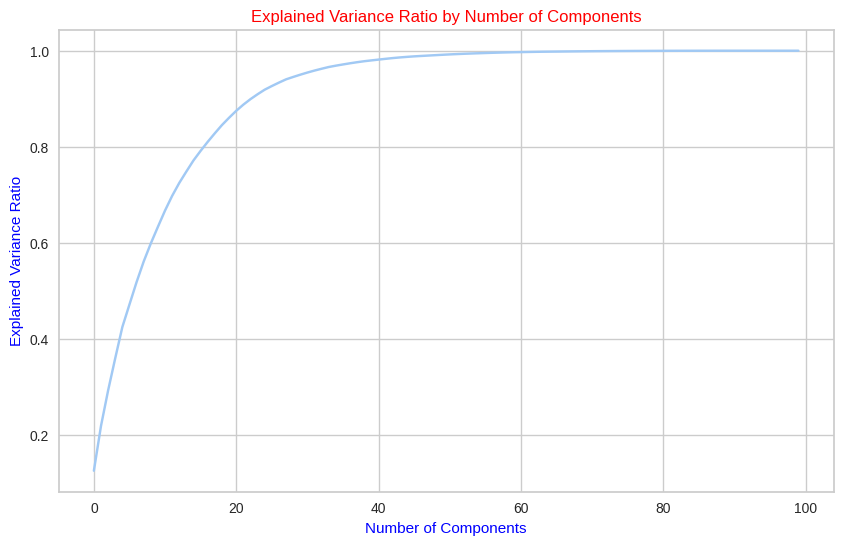

In [62]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components',color='blue')
plt.ylabel('Explained Variance Ratio',color='blue')
plt.title('Explained Variance Ratio by Number of Components',color='red')
plt.show()

##### Which dimensionality reduction technique have you used and why?

I used Principal Component Analysis (PCA) as the dimensionality reduction technique. PCA is a commonly used technique to reduce the dimensionality of high-dimensional data while retaining most of its important information.

PCA works by transforming the original features into a new set of uncorrelated features called principal components. These principal components are linear combinations of the original features, and they are ordered by the amount of variance they explain in the data. The first principal component explains the most variance, the second explains the second most variance, and so on. By selecting a subset of the principal components, you can effectively reduce the dimensionality of the data.

**The choice of PCA was based on a few reasons:**

**Dimensionality Reduction:** PCA helps in reducing the number of features while retaining as much variance as possible, which can improve the efficiency and performance of clustering algorithms.

**Interpretability:** By transforming the data into a lower-dimensional space defined by principal components, it becomes easier to visualize and interpret the data.

**Noise Reduction:** PCA tends to reduce the impact of noise in the data by focusing on the directions with the most variance.

**Clustering Performance:** In many cases, PCA can improve the performance of clustering algorithms by removing irrelevant features and focusing on the most relevant ones.

**Memory and Computation Efficiency:** Reduced dimensionality results in a more memory-efficient representation of the data and can speed up computation.

## ***7. ML Model Implementation***

### **1. K-Means Clustering**

Finding the optimal number of clusters using the elbow method

In [63]:
# List to store within-cluster sum of squares (WCSS) values for different number of clusters
wcss = []

# Loop through different numbers of clusters to find the optimal value of k
for i in range(1, 31):
    # Create a KMeans instance with the current number of clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=33)

    # Fit the KMeans model to the data and calculate the WCSS
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In this project, I used the KMeans clustering algorithm. KMeans is an unsupervised machine learning algorithm that aims to partition a dataset into a specified number of clusters. It works by iteratively assigning data points to the nearest cluster centroid and then recalculating the centroids based on the assigned points. The process continues until convergence, and the result is a grouping of data points into distinct clusters.

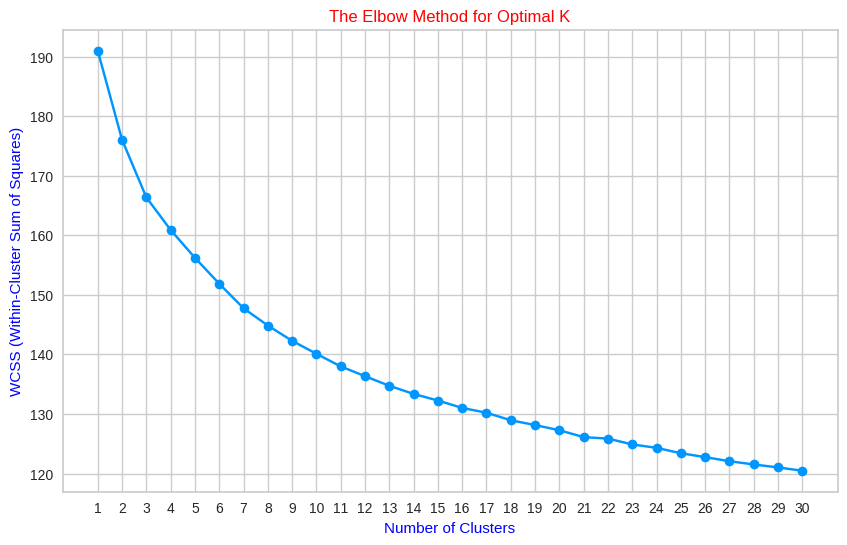

In [82]:
# Range of numbers of clusters
number_clusters = range(1, 31)

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(number_clusters, wcss, marker='o',color='#0096FF')
plt.title('The Elbow Method for Optimal K',color='red')
plt.xlabel('Number of Clusters',color='blue')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)',color='blue')
plt.xticks(number_clusters)
plt.grid(True)
plt.show()

#### 2. Observations

**With more clusters, there is a decrease in the sum of squared distances between each point and the centroid.**

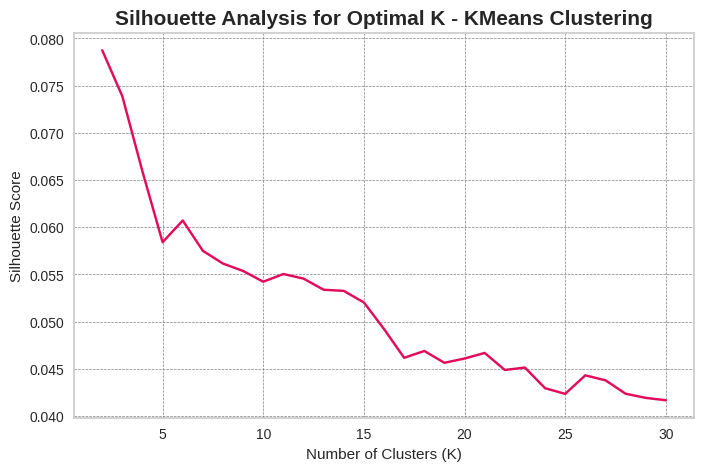

In [83]:
def plot_silhouette_score(x_pca, max_clusters=30):
    # Create a range of cluster numbers from 2 to max_clusters.
    range_n_clusters = range(2, max_clusters + 1)
    silhouette_avg = []

    # Loop through different values of 'n_clusters'.
    for num_clusters in range_n_clusters:
        # Initialize the KMeans model with the current number of clusters.
        kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=33)

        # Fit the KMeans model to the transformed feature matrix 'X'.
        cluster_labels = kmeans.fit_predict(X)

        # Calculate the Silhouette score for the current number of clusters.
        silhouette_avg.append(silhouette_score(X, cluster_labels))

    # Plot the Silhouette scores against the number of clusters.
    plt.figure(figsize=(8, 5))
    plt.plot(range_n_clusters, silhouette_avg, color='#E30B5C')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis for Optimal K - KMeans Clustering', fontsize=15, fontweight='bold')
    plt.grid(color='grey', linestyle='--', linewidth=0.5)
    plt.show()

# Call the function with the transformed feature matrix 'x_pca' and the maximum number of clusters to consider.
plot_silhouette_score(X, max_clusters=30)

In [70]:
# Creating Silhouette function for k means clustering
from yellowbrick.cluster import SilhouetteVisualizer

def silhouette_score_analysis(n_clusters_upper_limit):
    for n_clusters in range(2, n_clusters_upper_limit):
        km = KMeans(n_clusters=n_clusters, random_state=5)
        preds = km.fit_predict(X)
        score = silhouette_score(X, preds, metric='euclidean')
        print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
        visualizer = SilhouetteVisualizer(km)
        visualizer.fit(X)
        visualizer.poof()

For n_clusters = 2, silhouette score is 0.07873514581539724


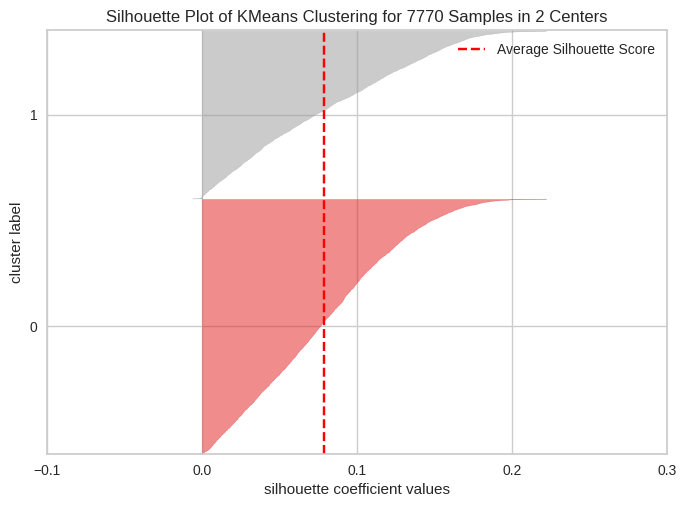

For n_clusters = 3, silhouette score is 0.07382493912702383


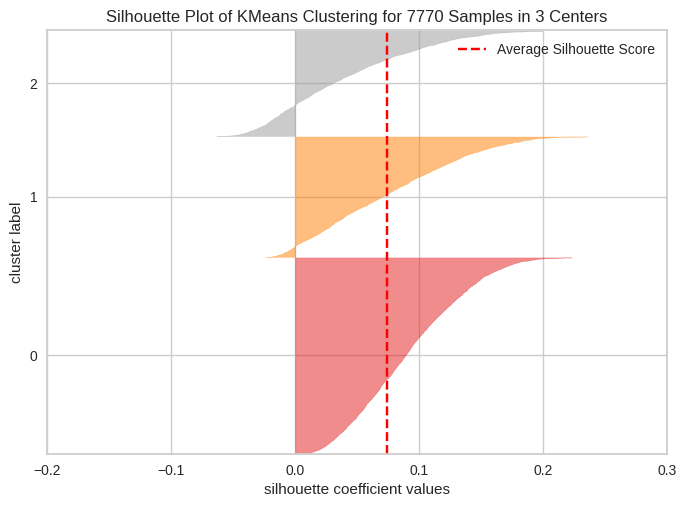

For n_clusters = 4, silhouette score is 0.0660168554106273


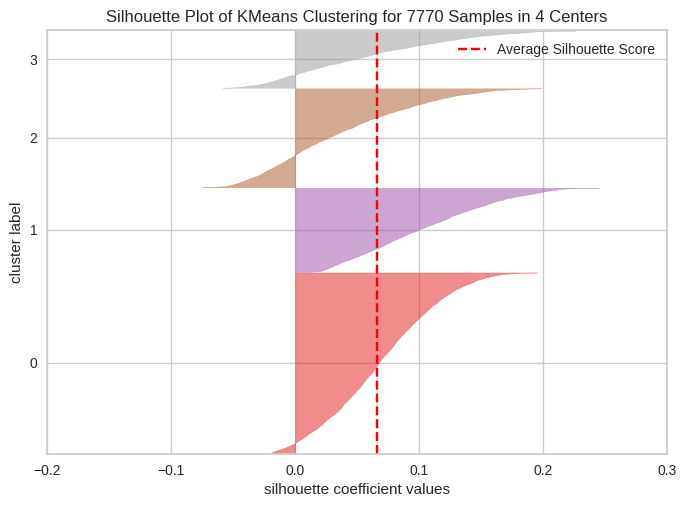

For n_clusters = 5, silhouette score is 0.0584619543430842


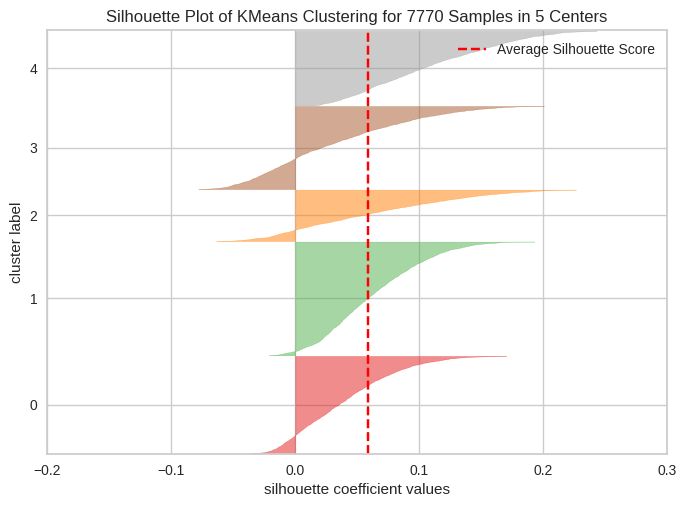

For n_clusters = 6, silhouette score is 0.056629084927668334


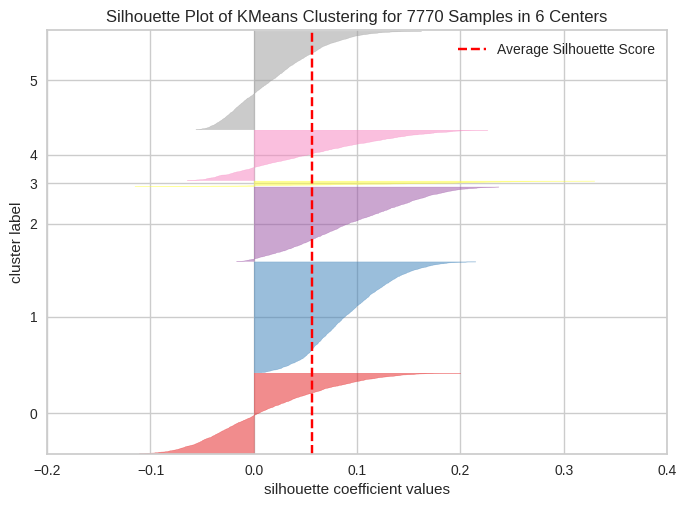

In [71]:
# Call the function with the desired upper limit for 'n_clusters'.
silhouette_score_analysis(7)

**Observations:**

*   Sixth(6th) clusters receive the highest Silhouette score overall.
*   Utilising the k-means clustering algorithm to create 6 clusters.

In [75]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=50)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=50)

In [76]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)
print((kmeans_distortion,kmeans_silhouette_score))

(152.732843687022, 0.05880816111805213)


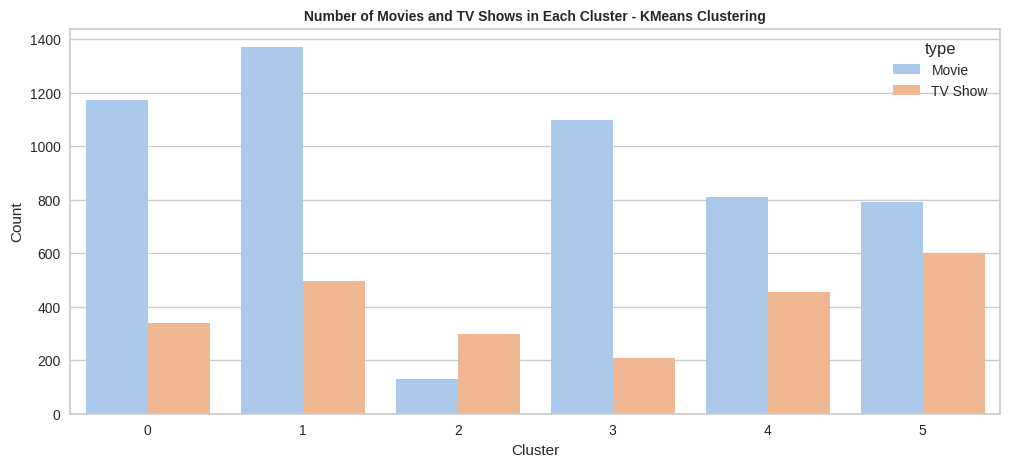

In [80]:
# Adding a kmeans cluster number attribute
nf['kmeans_cluster'] = kmeans.labels_

# Create a count plot to show the number of movies and TV shows in each cluster using Seaborn.
plt.figure(figsize=(12, 5))
q = sns.countplot(x='kmeans_cluster', data=nf, hue='type', palette='pastel')

# Set the title and labels for the plot.
plt.title('Number of Movies and TV Shows in Each Cluster - KMeans Clustering', fontsize=10, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Show the plot.
plt.show()

#### 3. Building wordclouds for different clusters built:

In [92]:
def kmeans_wordcloud(cluster_num):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # Get descriptions for the specified cluster number
    cluster_descriptions = nf[nf['kmeans_cluster'] == cluster_num]['description'].values

    # Check if there are no descriptions for the cluster
    if len(cluster_descriptions) == 0:
        print(f"No descriptions found for Cluster {cluster_num}")
        return

    # Iterate through the descriptions and tokenize the words
    for val in cluster_descriptions:
        val = str(val)
        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens) + " "

    # Generate the WordCloud
    wordcloud = WordCloud(width=700, height=700, background_color='azure', stopwords=stopwords, min_font_size=8).generate(comment_words)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for Cluster {cluster_num}', fontsize=15, fontweight='bold')
    plt.show()


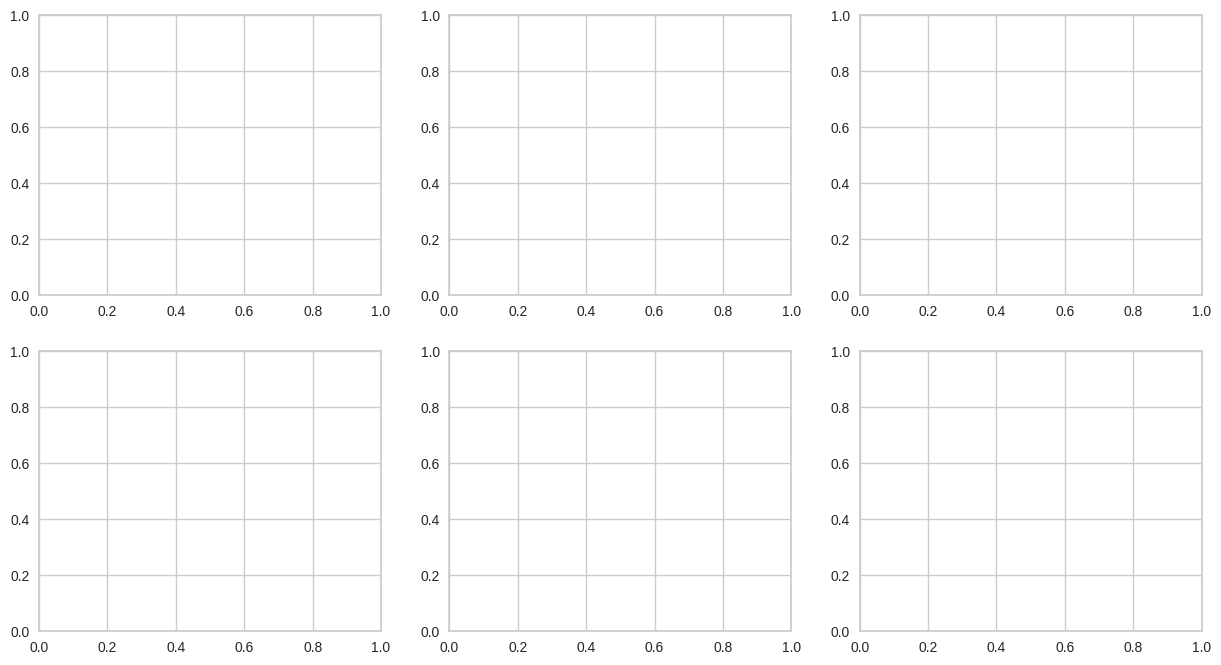

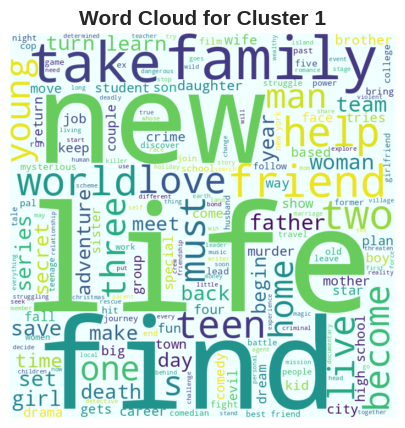

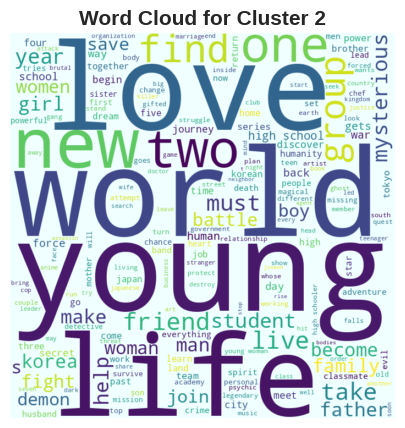

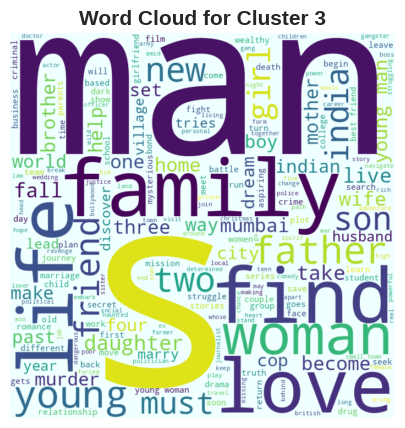

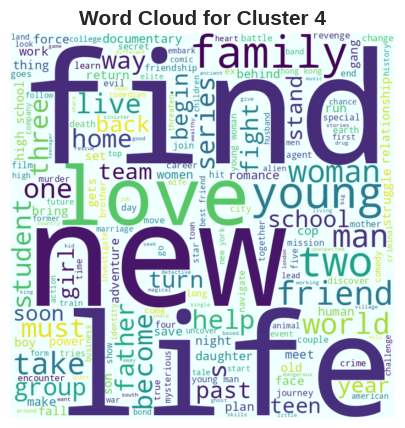

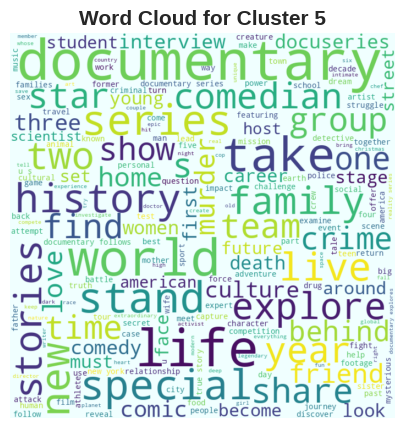

No descriptions found for Cluster 6


<Figure size 800x550 with 0 Axes>

In [93]:
# Create a 2x3 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()  # Flatten the 2D array for easy iteration

# Iterate through clusters 1 to 6 and display the WordCloud for each cluster
for cluster_num in range(1, 7):
    ax = axs[cluster_num - 1]

    # Call the kmeans_wordcloud function for the current cluster
    kmeans_wordcloud(cluster_num)

    ax.set_title(f'Cluster {cluster_num}', fontsize=12, fontweight='bold', color='red')
    ax.axis("off")

plt.tight_layout()
plt.show()

### **2. Hierarchical clustering**

In k Means we have to define the no of cluster that is k=6 but in hierarchical clustering takes away the problem of having to pre-define the number of clusters. Uses the agglomerative (hierarchical) clustering process for building clusters. Using the dendrogram to visualize the agglomerative (hierarchical) clustering process to determine the ideal number of clusters.

#### 1. Building a dendogram to decide on the number of clusters

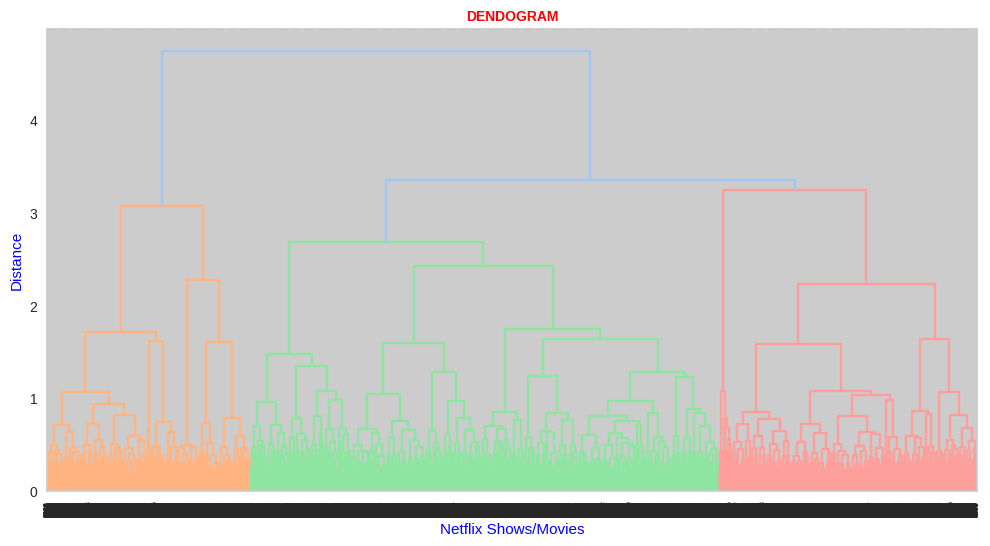

In [94]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(12,6))
dend = shc.dendrogram(shc.linkage(X, method='ward'))

# Add a horizontal line at y=5 to indicate the threshold for merging clusters.
plt.axhline(y=5, color='red', linestyle='--')

# Change the color of the dendrogram lines to red and grey.
plt.title('DENDOGRAM',fontsize=10, fontweight='bold',color='red')
plt.xlabel('Netflix Shows/Movies',color='blue')
plt.ylabel('Distance',color='blue')
plt.axhline(y= 5, color='r', linestyle='--')

#### 2. Agglomerative hierarchical clustering:

Agglomerative hierarchical clustering:Uses Bottom Up Approach.Suppose there are 4 data points. We will assign clusters to each data points and hence will have 4 clusters in the beginning.Then, at each iteration, we merge the closest pair of clusters and repeat this step until only a single cluster is left.

In [95]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=12, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

array([10,  6,  0, ...,  5,  0,  5])

In [96]:
# Adding a kmeans cluster number attribute
nf['hierarchical_cluster'] = hierarchical.labels_

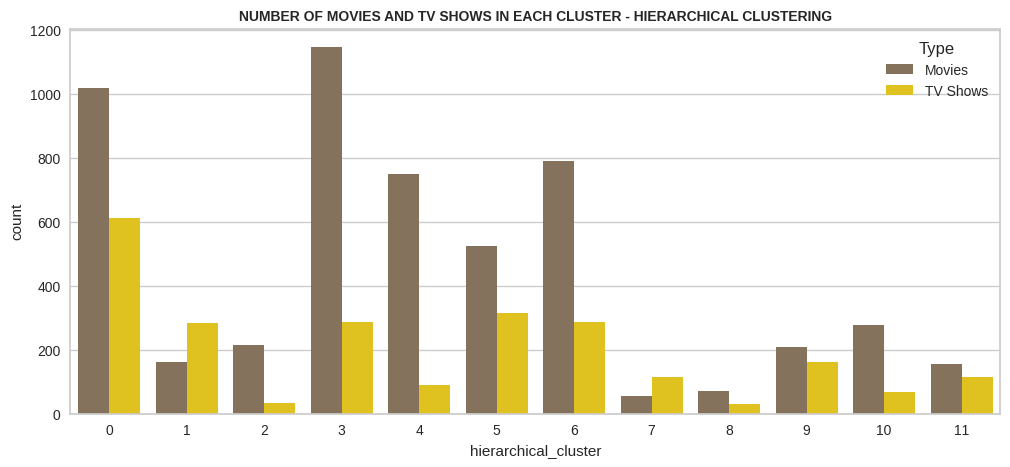

In [97]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(12, 5))
palette = ['#8B7355', '#FFD700']

q = sns.countplot(x='hierarchical_cluster', data=nf, hue='type', palette=palette)
plt.title('NUMBER OF MOVIES AND TV SHOWS IN EACH CLUSTER - HIERARCHICAL CLUSTERING', fontsize=10, fontweight='bold')

# Customize legend labels
legend_labels = ['Movies', 'TV Shows']
handles, _ = q.get_legend_handles_labels()
q.legend(handles=handles, labels=legend_labels, title='Type')

plt.show()

#### 3. Building wordclouds for different clusters

In [98]:
def hierarchical_worldcloud(cluster_num):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # Iterate through the DataFrame for the specified cluster number
    for val in nf[nf['hierarchical_cluster'] == cluster_num].description.values:
        val = str(val)
        tokens = val.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens) + " "

    # Generate the WordCloud
    wordcloud = WordCloud(width=700, height=700, background_color='azure', stopwords=stopwords, min_font_size=8).generate(comment_words)

    # Plot the WordCloud image
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for Hierarchical Cluster {cluster_num}', fontsize=10, fontweight='bold')
    plt.show()

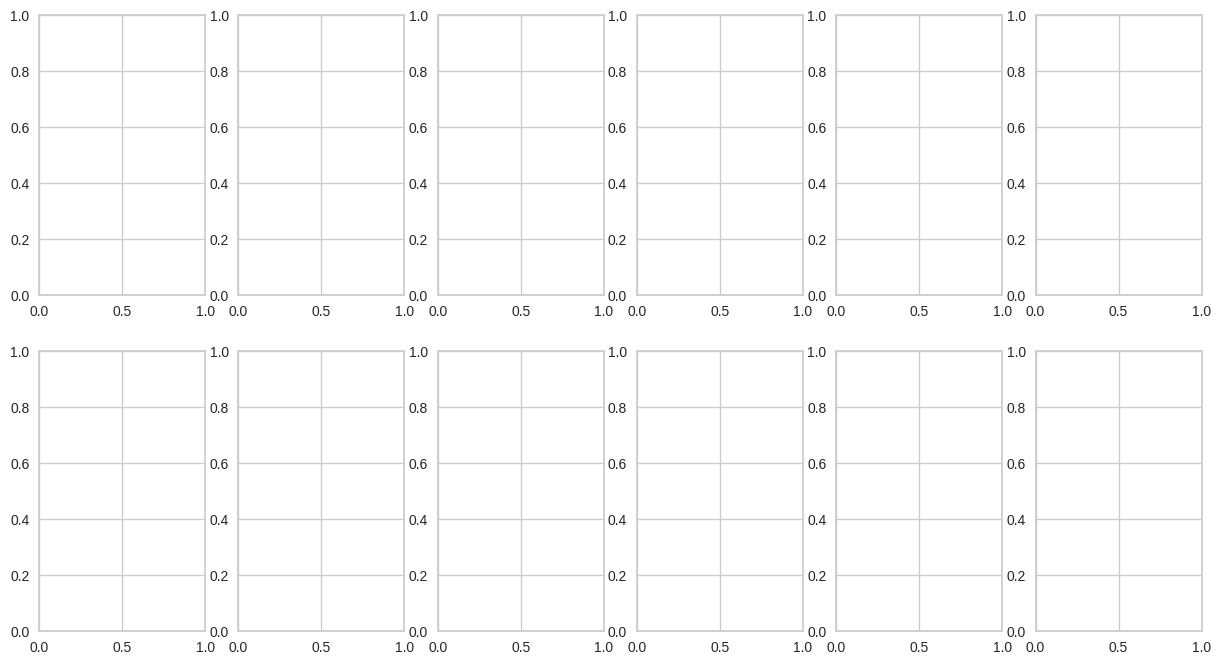

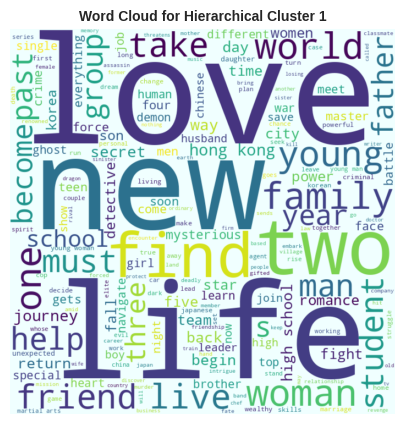

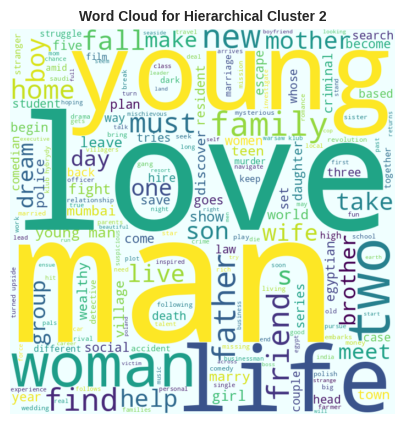

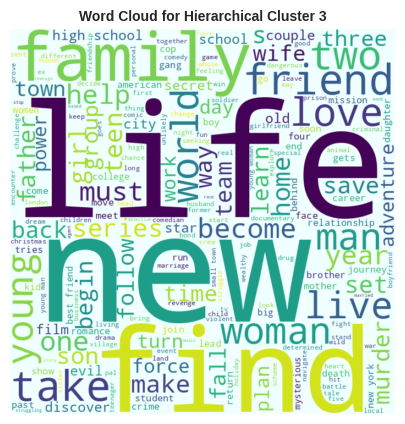

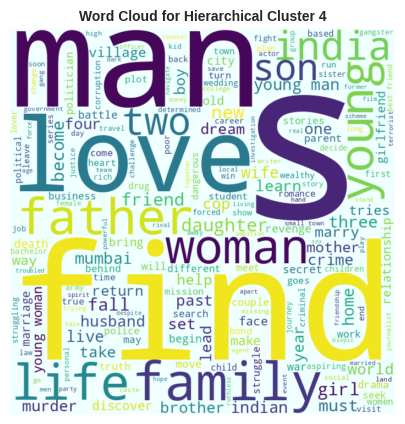

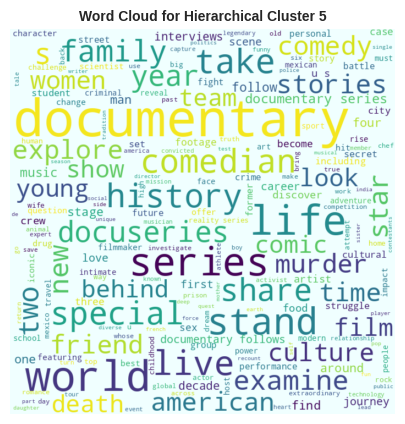

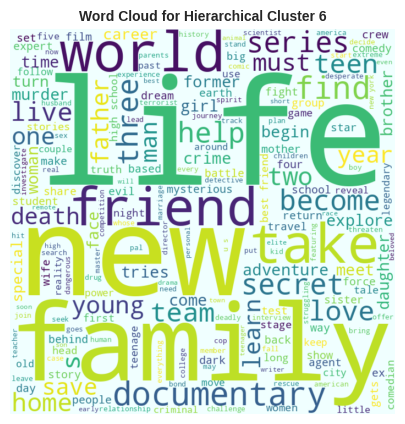

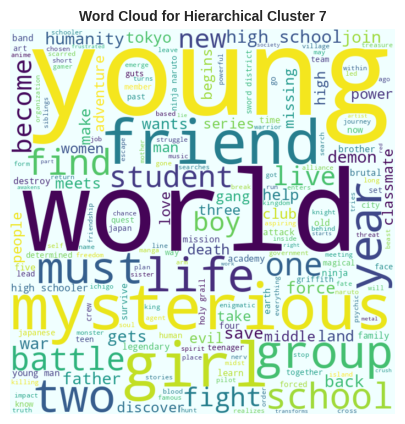

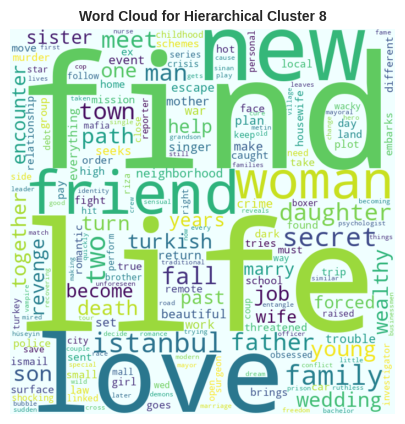

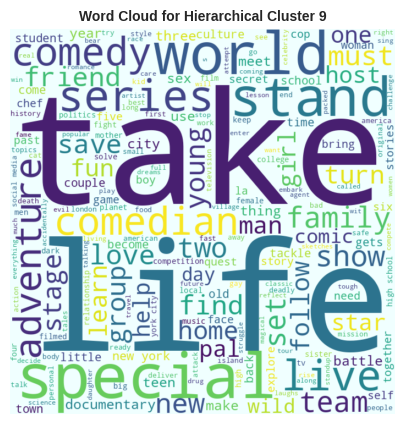

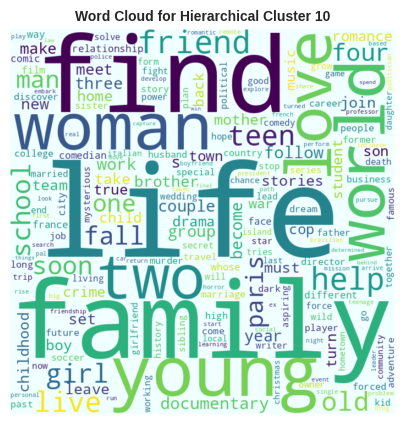

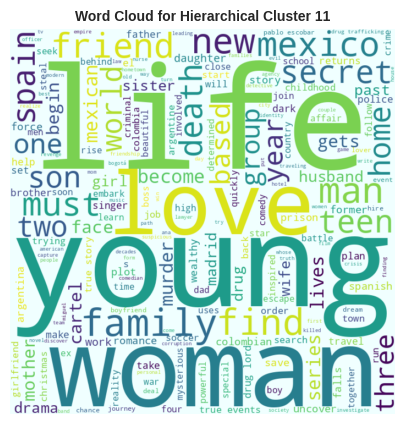

<Figure size 800x550 with 0 Axes>

In [99]:
# Create a 2x6 subplot grid
fig, axs = plt.subplots(2, 6, figsize=(15, 8))
axs = axs.ravel()  # Flatten the 2D array for easy iteration

# Iterate through clusters 1 to 11 and display the WordCloud for each cluster
for cluster_num in range(1, 12):
    ax = axs[cluster_num - 1]

    # Call the hierarchical_worldcloud function for the current cluster
    hierarchical_worldcloud(cluster_num)

    ax.set_title(f'Cluster {cluster_num}', fontsize=12, fontweight='bold',color='red')
    ax.axis("off")

plt.tight_layout()
plt.show()

## **8. Get Recommendations:**

 Recommender System is to recommend relevant items for users, based on their preference

In [100]:
# Initialize a TfidfVectorizer
t_vectorizer = TfidfVectorizer()

# Fit and transform the clustering_data using the TfidfVectorizer
count_matrix = t_vectorizer.fit_transform(clustering_data)

# Calculate the cosine similarity between documents in the count_matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Print the cosine similarity matrix
print(cosine_sim)

[[1.         0.03274272 0.02002995 ... 0.00233468 0.02327341 0.        ]
 [0.03274272 1.         0.00561537 ... 0.05026046 0.00219877 0.        ]
 [0.02002995 0.00561537 1.         ... 0.00759726 0.00215815 0.        ]
 ...
 [0.00233468 0.05026046 0.00759726 ... 1.         0.00297481 0.20159534]
 [0.02327341 0.00219877 0.00215815 ... 0.00297481 1.         0.02535365]
 [0.         0.         0.         ... 0.20159534 0.02535365 1.        ]]


In [101]:
# Changing the index of the df from show id to show title
nf['show_id'] = nf.index

In [102]:
indices = pd.Series(nf.index)
indices[:5]

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [103]:
# setting title of movies/Tv shows as index
nf.set_index('title',inplace=True)

In [113]:
# function that takes in movie title as input and returns the top 10 recommended movies
indices = pd.Series(nf.index)
def recommendations(title, cosine_sim = cosine_sim):

    recommended_movies = []

    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)

    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(nf.index)[i])


    return recommended_movies

In [118]:
print("If you like 'Bad Boys' you might like")
pd.DataFrame(recommendations('Bad Boys'), columns=['Recommendations'])

If you like 'Bad Boys' you might like


Recommendations
0                      Bad Boys II
1                        GoldenEye
2                    Tortilla Soup
3  Martin Lawrence Live: Runteldat
4                  War on Everyone
5                        Slow West
6                  Madam Secretary
7                 Operation Odessa
8            Tremors 5:  Bloodline
9                     Act of Valor

In [121]:
# Recomendation for TV Series 'Peaky Blinders'
print("If you like 'Peaky Blinders' you might like")
pd.DataFrame(recommendations('Peaky Blinders'), columns=['Recommendations'])

If you like 'Peaky Blinders' you might like


Recommendations
0                      Inception
1                      Rebellion
2               Caught on Camera
3    The Frankenstein Chronicles
4                   Happy Valley
5          The Murder Detectives
6  Jonathan Strange & Mr Norrell
7                  Kiss Me First
8                         Loaded
9                  Transcendence

# **Conclusion**

**Embarking on a Cinematic Adventure with Netflix Data!**
 **Launching into Data Realms:** Prepare for an exhilarating voyage as we unveil the secrets of Netflix's vast content library through the lens of data science.

 **Data Transformation Magic:** Just like wizards, we worked our magic to transform jumbled descriptions into neat and organized data. Imagine tidying up your room, but with words instead of toys!

 **Unlocking the Puzzle of Similarity:** Think of movies and TV shows as puzzle pieces, and we sorted them based on their unique shapes and colors. This helped us uncover fascinating connections between seemingly unrelated content.

 **Discovering Hidden Patterns:** Imagine being a detective, hunting for hidden clues. We used complex algorithms to discover hidden patterns in the data. It's like decoding a secret message that only data can reveal.

 **Venturing into Clusters of Content:** We embarked on a cosmic journey, exploring clusters of movies and shows that share striking similarities. It's like discovering galaxies of content with their own themes and vibes.

 **Crafting Word Art with Clouds:** Ever wanted to paint with words? Enter the enchanting world of word clouds, where themes and emotions take shape through the art of language.

 **Sharing the Enchantment:** The magic doesn't stop here! We've harnessed the power of data to create personalized Netflix recommendations, tailored just for you.

 **A Spectacular Finale:** As the curtains close on our data-driven adventure, remember that the stories continue to unfold. Armed with insights, you're now poised to experience Netflix in a whole new dimension. Lights, camera, data!


---

